# Capstone Project 3 - Image Classification

Name: Nurulhusna Binti Jamal Ali

Group: YP-AI04

## Problem Formulation

**Problem:**
Perform image classification to classify concrete images as either having cracks or being crack-free.

**Data:**
The dataset contains images of concrete with and without cracks.

**Task:**
Given an input image of concrete, the model should predict whether the concrete in the image has cracks or not.

**Input:**
Images of concrete samples, each represented as a matrix of pixel values. The size and dimensions of the images may vary.

**Output:**
A binary classification label indicating whether the concrete has cracks (1) or is crack-free (0).

**Evaluation Metric:**
Accuracy is chosen as the evaluation metric. It represents the proportion of correctly classified samples over the total number of samples in the test set.

**Significance:**
Concrete cracks can lead to safety hazards and reduce the durability of buildings. By accurately classifying concrete images, we can identify areas that require repair and ensure the structural integrity of buildings, potentially saving lives and preventing costly damages.

**Constraints:**
1. The model should be computationally efficient to allow for real-time or near-real-time predictions.
2. The model should be robust enough to handle different lighting conditions, angles, and concrete variations.


## 1. Data Preparation

### 1.1 Install Dependencies and Setup

In [1]:
!pip install opencv-python matplotlib 

In [2]:
!pip list

Package                       Version
----------------------------- --------
absl-py                       1.4.0
asttokens                     2.2.1
astunparse                    1.6.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
cachetools                    5.3.1
certifi                       2023.5.7
charset-normalizer            3.2.0
colorama                      0.4.6
contourpy                     1.1.0
cycler                        0.11.0
debugpy                       1.5.1
decorator                     5.1.1
executing                     1.2.0
flatbuffers                   23.5.26
fonttools                     4.41.0
gast                          0.4.0
google-auth                   2.22.0
google-auth-oauthlib          0.4.6
google-pasta                  0.2.0
grpcio                        1.56.0
h5py                          3.9.0
idna                          3.4
importlib-metadata            6.8.0
importlib-resources           6.0.0
ipykernel       

In [3]:
import tensorflow as tf
import keras.api._v2.keras as keras
import os

### 1.2 Remove Dodgy Images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### 1.3 Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = keras.utils.image_dataset_from_directory('data')

Found 40000 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

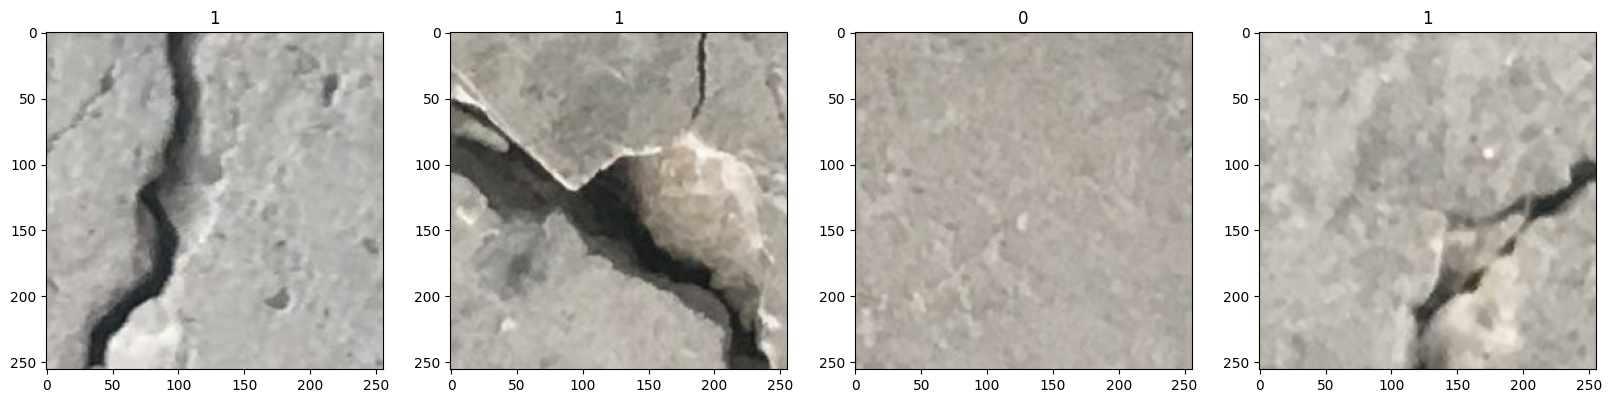

In [12]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 1.4 Scale Data

In [13]:
data = data.map(lambda x,y: (x/255,y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.6313726 , 0.6       , 0.54901963],
          [0.6574142 , 0.62604165, 0.57506126],
          [0.673989  , 0.64261645, 0.591636  ],
          ...,
          [0.16803768, 0.15124081, 0.11927849],
          [0.17846967, 0.15886183, 0.13533242],
          [0.1882353 , 0.16862746, 0.14509805]],
 
         [[0.6183517 , 0.58697915, 0.53599876],
          [0.64709544, 0.6157229 , 0.5647425 ],
          [0.66889   , 0.63751745, 0.58653706],
          ...,
          [0.18105851, 0.16426164, 0.13229932],
          [0.19204363, 0.17243579, 0.14890638],
          [0.20451133, 0.18490349, 0.16137408]],
 
         [[0.6072534 , 0.5758808 , 0.52490044],
          [0.63655025, 0.6051777 , 0.5541973 ],
          [0.66545796, 0.6340854 , 0.583105  ],
          ...,
          [0.19295293, 0.17695214, 0.13857181],
          [0.20606618, 0.1892693 , 0.15730698],
          [0.219087  , 0.20229013, 0.17032781]],
 
         ...,
 
         [[0.55072   , 0.523269  , 0.4840533 ],
          [0.54279

### 1.5 Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) 

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
print([train_size, val_size, test_size])

[875, 250, 125]


## 2. Model Development 

### 2.1 Building Deep Learning Model

In [18]:
print(train)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

### 2.2 Train

In [24]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [25]:
logdir = 'logs'

In [26]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [27]:
print(train)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [28]:
#hist = model.fit(train, epochs=5, validation_data=val, callbacks=[early_stopping_callback, tensorboard_callback]) -- taking longer time to run
history = model.fit(train, epochs=2, validation_data=val, callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/2
875/875 [==============================] - 2435s 3s/step - loss: 0.2001 - accuracy: 0.9448 - val_loss: 0.1156 - val_accuracy: 0.9776
Epoch 2/2
875/875 [==============================] - 2578s 3s/step - loss: 0.0655 - accuracy: 0.9812 - val_loss: 0.0494 - val_accuracy: 0.9833


## 3.0 Model Evaluation 

### 3.1 Plot Performance

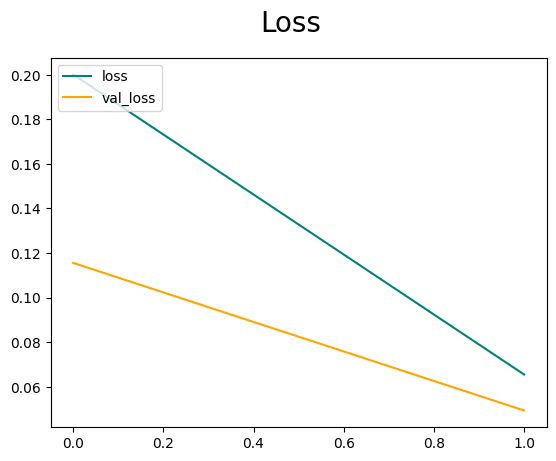

In [29]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

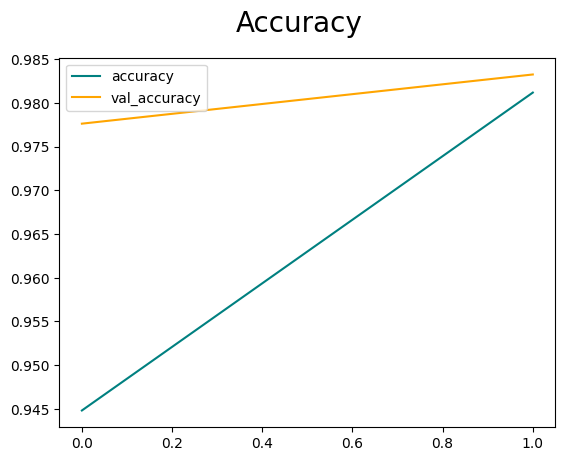

In [30]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### 3.2 Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    x,y = batch
    pred = model.predict(x)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

1/1 [==============================] - 1s 504ms/step


In [35]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.9918575 0.9754755 0.98375


In [37]:
print(f"Precision: ", pre.result().numpy())
print(f"Recall: ", re.result().numpy())
print(f"Accuracy: ", acc.result().numpy())

Precision:  0.9918575
Recall:  0.9754755
Accuracy:  0.98375


## 4.0 Test

In [38]:
import cv2

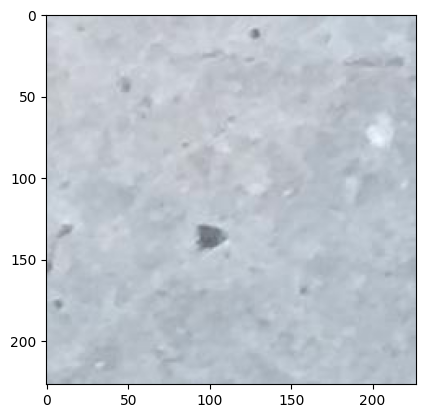

In [44]:
img = cv2.imread('00007.jpg')
plt.imshow(img)
plt.show()

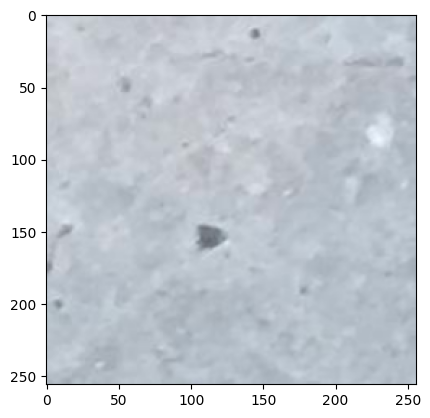

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
y_pred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 57ms/step


In [47]:
y_pred

array([[0.04291518]], dtype=float32)

In [48]:
if y_pred > 0.5:
    print(f'Predicted class has a concrete cracks')
else:
    print(f'Predicted class does not have concrete cracks')

Predicted class does not have concrete cracks


## 5. Model Deployment

### 5.1 Save Model

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models', 'Capstone_Proj3.h5'))

### 5.2 Deploy Model to make Prediction

- without preforming training

In [51]:
load_model = load_model('./models/Capstone_Proj3.h5')

In [52]:
load_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 1s 852ms/step


array([[0.04291518]], dtype=float32)

In [53]:
if y_pred > 0.5:
    print(f'Predicted class has a concrete cracks')
else:
    print(f'Predicted class does not have concrete cracks')

Predicted class does not have concrete cracks


In [78]:
import pickle

# File path where you want to save the model
file_path = 'Capstone_Proj3_model.pkl'

# Save the model to the file using the 'wb' mode for writing in binary format
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print("Model saved to:", file_path)


INFO:tensorflow:Assets written to: ram://a8e0b734-cdb6-4664-8f09-2d70f62c8597/assets


INFO:tensorflow:Assets written to: ram://a8e0b734-cdb6-4664-8f09-2d70f62c8597/assets


Model saved to: Capstone_Proj3_model.pkl


In [112]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as a PNG file
keras.utils.plot_model(model, show_shapes=True, to_file='model_architecture.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
